In [ ]:
##
###### README ######
##
### Data Columns in the xlsx file - sheet 0 ###
# col1 Date
# col2 Open
# col3 High
# col4 Low
# col5 Close
# col6 Volume
# col7 Stock Adj Close Price (Y)
# col8 Sentiment Score1   (X1)  Financial Dictionary approach
# col9 Sentiment Score2   (X2)  Harvard Dictionary approach
# col10 Sentiment Score3  (X3)  Naive Bayes approach

# Evaluate cubic regression to predict Stock Price volatility using Sentiment Score (Naive Bayes model)


In [16]:
import numpy as np
import tensorflow as tf
import xlrd

DATA_FILE = 'SentimentVsClosePrices.TSLA.xlsx'
STOCK = 'TSLA'

# column indices for X, Y
STOCK_PRICE_COLUMN=6
SENTIMENT_SCORE_BAYES_COLUMN=9

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
n_samples = sheet.nrows - 1
print('total samples: {0}'.format(n_samples))

# Step 2: use 80% of data for training, remaining for test.
train_samples = int(0.8*n_samples)
train_data = np.asarray([sheet.row_values(i) for i in range(1, train_samples)])
test_samples = n_samples - train_samples
test_data = np.asarray([sheet.row_values(i) for i in range(train_samples+1, n_samples)])

all_data = np.asarray([sheet.row_values(i) for i in range(1, n_samples)])

# train samples
print('\nnumber of train samples: {0}'.format(train_samples))
print('Train sentiment scores {0}'.format(train_data.T[SENTIMENT_SCORE_BAYES_COLUMN]))
print('Train close prices {0}'.format(train_data.T[STOCK_PRICE_COLUMN]))

# test samples
print('\nnumber of test samples: {0}'.format(test_samples))
print('Test sentiment scores: {0}'.format(test_data.T[SENTIMENT_SCORE_BAYES_COLUMN]))

total samples: 42

number of train samples: 33
Train sentiment scores [ -2.15533000e-04   1.45012757e-01   8.52621520e-02   1.75235580e-02
   7.35899400e-02   6.71693880e-02   7.92319840e-02   1.42857606e-01
   3.66558852e-01   2.70050397e-01   2.83548897e-01   1.21376977e-01
   1.37795424e-01   1.59013875e-01   1.14907104e-01   1.27991653e-01
   2.19111608e-01   2.99646939e-01   5.80651923e-01   2.48405329e-01
   3.60413119e-01   2.16796386e-01   1.20945570e+00   9.48544868e-01
   5.99414790e-01   3.78887808e-01   3.71400372e-01   6.84052082e-01
   3.21124961e-01   3.56504400e-01   4.97909742e-01   2.36812532e-01]
Train close prices [ 250.479996  251.570007  251.210007  248.589996  246.869995  244.899994
  243.690002  246.169998  258.        255.729996  262.049988  261.5
  261.920013  250.679993  255.009995  254.779999  263.160004  270.220001
  277.450012  277.380005  277.920013  278.299988  298.519989  303.700012
  295.        298.700012  302.540009  312.390015  308.709991  296.83999

In [2]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

print(X)
print(Y)

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights_1')
u = tf.Variable(0.0, name='weights_2')
v = tf.Variable(0.0, name='weights_3')
b = tf.Variable(0.0, name='bias')

print(w)
print(u)
print(v)
print(b)

# Step 4: build cubic model to predict Y
Y_predicted = (X * X * X * w) + (X * X * u) + (X * v) + b 
print(Y_predicted)

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)
Tensor("weights_1/read:0", shape=(), dtype=float32)
Tensor("weights_2/read:0", shape=(), dtype=float32)
Tensor("weights_3/read:0", shape=(), dtype=float32)
Tensor("bias/read:0", shape=(), dtype=float32)
Tensor("add_2:0", dtype=float32)


In [7]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

learning_rate = 0.0001
train_times=1000      # train the model 1000 times

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [8]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    writer = tf.summary.FileWriter('C:/cygwin64/home/mpatnam/CSCIE63/Project/tensorboard/'+STOCK+'.cubic_regression', sess.graph)
    
    # Step 8: train the model
    for i in range(train_times): # train the model 100 times
        total_loss = 0
        for n, _, _, _, _, _, y, _, _, x, _ in train_data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 

    # Step 9: output the values of w, u and b
    w_value, u_value, v_value, b_value = sess.run([w, u, v, b]) 

Epoch 0: 56425.28757440476
Epoch 1: 55606.226655505954
Epoch 2: 54799.23316592262
Epoch 3: 54004.126860119046
Epoch 4: 53220.73335193453
Epoch 5: 52448.87872023809
Epoch 6: 51688.39546130953
Epoch 7: 50939.111421130954
Epoch 8: 50200.86430431547
Epoch 9: 49473.491536458336
Epoch 10: 48756.83026413691
Epoch 11: 48050.72479538691
Epoch 12: 47355.01776413691
Epoch 13: 46669.55543154762
Epoch 14: 45994.18926711309
Epoch 15: 45328.764973958336
Epoch 16: 44673.138950892855
Epoch 17: 44027.16489955357
Epoch 18: 43390.70293898809
Epoch 19: 42763.610026041664
Epoch 20: 42145.74981398809
Epoch 21: 41536.98344494047
Epoch 22: 40937.18015252976
Epoch 23: 40346.20600818453
Epoch 24: 39763.93015252976
Epoch 25: 39190.22600446428
Epoch 26: 38624.962983630954
Epoch 27: 38068.01832217262
Epoch 28: 37519.27622767857
Epoch 29: 36978.607142857145
Epoch 30: 36445.89295014881
Epoch 31: 35921.01860119047
Epoch 32: 35403.86960565476
Epoch 33: 34894.328031994046
Epoch 34: 34392.28218005953
Epoch 35: 33897.6227

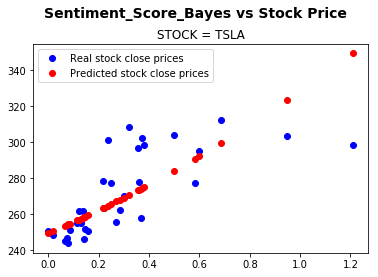

In [18]:
import matplotlib.pyplot as plt

# plot the results
def plot(model_name, price_idx, color): 
    fig = plt.figure()
    fig.suptitle(model_name, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title('STOCK = ' + STOCK)
    X, Y = train_data.T[price_idx], train_data.T[STOCK_PRICE_COLUMN]
    ax.plot(X, Y, color, label='Real stock close prices')
    ax.plot(X, (X * X * X * w_value) + (X * X * u_value) + (X * v_value) + b_value, 'ro', label='Predicted stock close prices')
    ax.legend()
    plt.show()
    
plot('Sentiment_Score_Bayes vs Stock Price', SENTIMENT_SCORE_BAYES_COLUMN, 'bo')

In [13]:
# calculate squared value (for RMSE purpose) given a predicted and actual value
def squared_error(pred, actual):
    return (pred - actual) ** 2

# Step 8: report results
print('Weight_1: %2.5f' % w_value)
print('Weight_2: %2.5f' % u_value)
print('Weight_3: %2.5f' % v_value)
print('Bias: %2.5f' % b_value)

X, Y = test_data.T[SENTIMENT_SCORE_BAYES_COLUMN], test_data.T[STOCK_PRICE_COLUMN]
Y_predicted_val = (X * X * X * w_value) + (X * X * u_value) + (X * v_value) + b_value
print('Predicted #thefts using test data:{0}'.format(Y_predicted_val))
print('Actual #thefts:{0}'.format(Y))

# measure RMSE accuracy
accuracy_rmse = np.sqrt(squared_error(Y_predicted_val, Y).mean())
print('Cubic model loss using RMSE: ', accuracy_rmse)

Weight_1: 0.68809
Weight_2: 16.87248
Weight_3: 61.48683
Bias: 249.20491
Predicted #thefts using test data:[ 264.05816119  262.120353    266.59015063  262.93714169  273.07753348
  259.72650922  259.55116474  266.69186346]
Actual #thefts:[ 305.519989  302.51001   305.600006  308.029999  313.790009  310.170013
  308.630005  314.070007]
Cubic model loss using RMSE:  44.386112607
